In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_directory(directory_name):
    X,Y= [],[]
    for filename in os.listdir(directory_name):
        image = cv2.imread(directory_name+"/"+filename)
        X.append(image)
        Y.append(int(filename[0]))
    X = np.array(X).astype(np.float64)/255
    Y = np.array(Y)
    return X,Y

In [3]:
X,Y = read_directory("data_set/mnist")
X,X_test,Y,Y_test = X[::2],X[1::2],Y[::2],Y[1::2]
epochs = 100
print(X.shape,Y.shape)

(21000, 28, 28, 3) (21000,)


In [7]:
model = keras.Sequential(
    [
        keras.layers.Flatten(name = 'IN_PUT',input_shape=(28,28,3,)),
        keras.layers.Dense(units=128,activation='relu',name = 'DENSE_1'),
        keras.layers.Dense(units=10,activation='sigmoid',name = 'DENSE_2'),
        tf.keras.layers.Softmax(name = 'OUT_PUT')
     
    ]
)
model.compile(
            optimizer='adam',
            loss= keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'] 
            )
train_history = model.fit(X,Y,epochs=epochs) 
model.summary() 
#model.save('my_model/09999_accuracy_nmist')

Epoch 1/100
657/657 [==============================] - 2s 3ms/step - loss: 1.5911 - accuracy: 0.8889
Epoch 2/100
657/657 [==============================] - 2s 3ms/step - loss: 1.5250 - accuracy: 0.9377
Epoch 3/100
657/657 [==============================] - 2s 3ms/step - loss: 1.5081 - accuracy: 0.9534
Epoch 4/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4997 - accuracy: 0.9610
Epoch 5/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4927 - accuracy: 0.9677
Epoch 6/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4886 - accuracy: 0.9721
Epoch 7/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4850 - accuracy: 0.9761
Epoch 8/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4822 - accuracy: 0.9780
Epoch 9/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4799 - accuracy: 0.9804
Epoch 10/100
657/657 [==============================] - 2s 3ms/step - loss: 1.4784 - accura

In [8]:
model.evaluate(X_test,Y_test)
test_list = []
test_jpg = cv2.imread("mnist_test.jpg")
test_list.append(test_jpg)
test_list = np.array(test_list).astype(np.float64)/255
predictions = model.predict(test_list)
print(predictions)
print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 40ms/step
[[0.08673523 0.08673523 0.08673523 0.08673523 0.08673523 0.08673523
  0.21938285 0.08673523 0.08673523 0.08673523]]
6


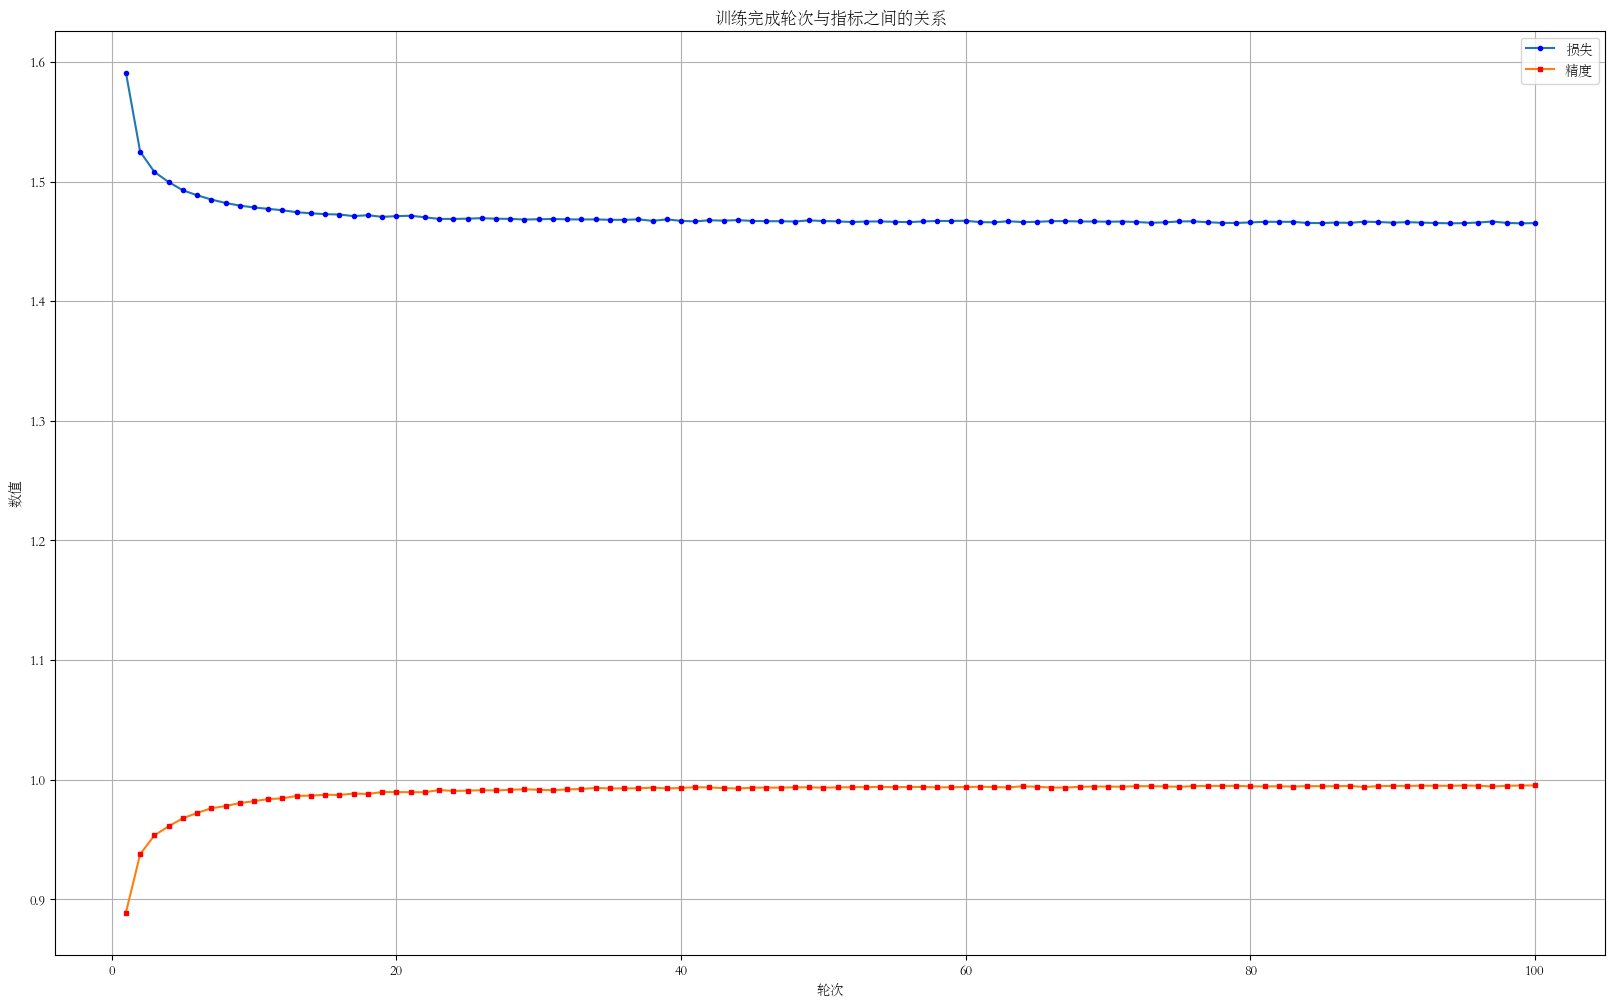

In [9]:
plt.rcParams['font.family'] = 'STSong'
train_time_list = range(1,epochs+1)
plt.figure(figsize=(20, 12))
plt.plot(train_time_list,train_history.history["loss"],'o-',markersize=3, markerfacecolor='blue', markeredgecolor='blue', label='损失')
plt.plot(train_time_list,train_history.history["accuracy"],'s-',markersize=3, markerfacecolor='red', markeredgecolor='red',label='精度')
plt.title('训练完成轮次与指标之间的关系')
plt.xlabel('轮次')
plt.ylabel('数值')
plt.legend()#曲线标识
plt.grid(True)#方格
plt.show()


In [6]:
cap  = cv2.VideoCapture(0)
if not cap.isOpened():
     print("无法检测到摄像头")
     exit()
else:
     for i in range(0, 19):
          print(cap.get(i))
     while(1):
          ret, frame = cap.read() #ret为布尔值是否读取到图片 fram为读取的图像
          height,width = frame.shape[:2] #原始图片尺寸
          print(height,width)
          cv2.imshow(u"frame", frame)
          capture_frame = cv2.rectangle(frame,(80,0),(560,480),(0,255,255),1)
          cv2.imshow(u"capture_frame", capture_frame)
          capture_height = 28
          capture_width = 28
          target_image = capture_frame[0:480,80:560,:]
          cv2.imshow(u"target_image", target_image)
          key = cv2.waitKey(1)
          if key & 0xff == ord('q') or key == 27:
               print("结束")
               break
     cap.release()
     cv2.destroyAllWindows()


-1.0
-1.0
-1.0
640.0
480.0
0.0
-466162819.0
-1.0
-1.0
-1.0
128.0
32.0
64.0
0.0
-1.0
-6.0
1.0
4600.0
-1.0
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640

In [2]:
cap  = cv2.VideoCapture(0)
if not cap.isOpened():
     print("无法检测到摄像头")
     exit()
else:
     for i in range(0, 19):
          print(cap.get(i))
     while(1):
          ret, frame = cap.read() #ret为布尔值是否读取到图片 fram为读取的图像
          height,width = frame.shape[:2] #原始图片尺寸
          print(height,width)
          cv2.imshow(u"frame", frame)
          target_image = frame[0:480,80:560,:]
          cv2.imshow(u"target_image", target_image)
          resize_image = cv2.resize(target_image,(28,28))
          cv2.imshow(u"resize_image", resize_image)
          key = cv2.waitKey(1)
          if key & 0xff == ord('q') or key == 27:
               print("结束")
               break
     cap.release()
     cv2.destroyAllWindows()


0.0
0.0
-1.0
640.0
480.0
30.0
22.0
-1.0
-1.0
1.0
128.0
32.0
64.0
0.0
-1.0
-6.0
1.0
1.0
1.0
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 640
480 6